In [198]:
### importação das bibliotecas ###
import pandas as pd
import numpy as np
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

### Overview do dataset ###
https://www.kaggle.com/datasets/abrambeyer/openintro-possum

O quadro de dados do gambá consiste em nove medições morfométricas em cada um dos 104 gambás da montanha, presos em sete locais do sul de Victoria ao centro de Queensland.

- case --> numero da observação
- site --> o número do local onde o gambá foi preso
- Pop --> população de gambás, seja Vic (Victoria) ou outra (Nova Gales do Sul ou Queensland).
- sex --> gênero: m (macho) ou f (fêmea)
- Age --> idade
- hdlngth --> comprimento da cabeça, em mm
- skullw --> largura do crânio, em mm
- totlngth --> comprimento total, em cm
- footlgth --> comprimento do pé
- taill --> comprimento da cauda, em cm
- earconch --> comprimento da concha da orelha
- eye --> distância do canto medial para canto lateral de olho direito
- chest --> cintura do peito (em cm)
- belly --> cintura da barriga (em cm)

In [199]:
### carga da base dados ###
df = pd.read_csv('possum.csv')

In [200]:
print('Data Points:',df.shape[0])
print('Atributos',df.shape[1])

Data Points: 104
Atributos 14


In [4]:
df.dtypes

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

In [5]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [7]:
df.head(3)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0


In [201]:
### separando os datasets pela população e sexo ###
df_vic = df.loc[df['Pop']=='Vic']
df_oth = df.loc[df['Pop']=='other']
df_m = df.loc[df['sex']=='m']
df_f = df.loc[df['sex']=='f']

## Estatística Descritiva das características dos gambás

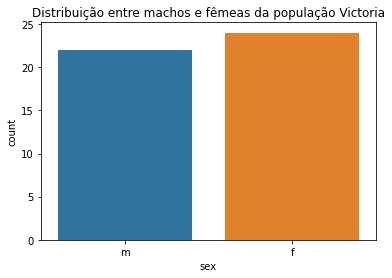

In [202]:
### distribuição do sexo na população Victoria ###
# Observa-se uma distribuição uniforme entre os sexos dessa população
sns.countplot(data=df_vic, 
    x='sex').set_title('Distribuição entre machos e fêmeas da população Victoria');

70.0 % da base é de machos


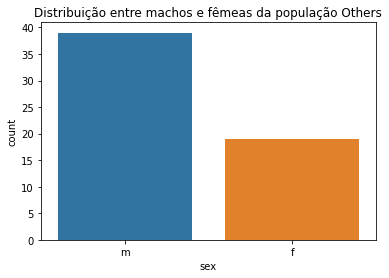

In [203]:
### distribuição do sexo na população Others ###
# Observa-se uma distribuição não uniforme entre os sexos dessa população
print(round(df_oth.loc[df_oth['sex']=='m'].shape[0]/df_oth.shape[0],1)*100,
 '% da base é de machos')
sns.countplot(data=df_oth, 
    x='sex').set_title('Distribuição entre machos e fêmeas da população Others');

In [204]:
### buscar unificar a base da população Others ###
# separando aleatoriamente a mesma quantidade de machos da de femeas
# a ideia seria tentar eliminar a contaminação (vies) por sexo na população
qtd_femeas = df_oth.loc[df_oth['sex']=='f'].shape[0]
df_oth_f = df_oth.loc[df_oth['sex']=='f']
df_oth_m = df_oth.loc[df_oth['sex']=='m'].sample(qtd_femeas)
df_oth = pd.concat([df_oth_f, df_oth_m])

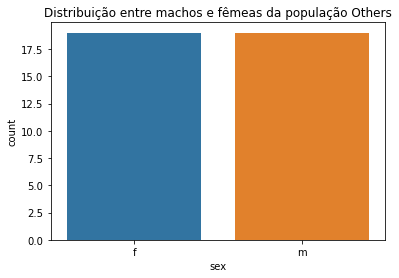

In [205]:
### distribuição após a uniformização ###
sns.countplot(data=df_oth, 
    x='sex').set_title('Distribuição entre machos e fêmeas da população Others');

### Estatísticas entre as Populações de gambás: Victoria e Others

In [206]:
### estatísticas do comprimento total dos gambás de populações distintas ###
print('Comprimento total médio Victoria:',round(df_vic['totlngth'].mean(),2),'cm')
print('Comprimento total médio Others:',round(df_oth['totlngth'].mean(),2),'cm')
print('Desvio padrão da Victoria:',round(df_vic['totlngth'].std(),2),'cm')
print('Desvio padrão da Other:',round(df_oth['totlngth'].std(),2),'cm')

Comprimento total médio Victoria: 87.47 cm
Comprimento total médio Others: 87.18 cm
Desvio padrão da Victoria: 4.85 cm
Desvio padrão da Other: 3.93 cm


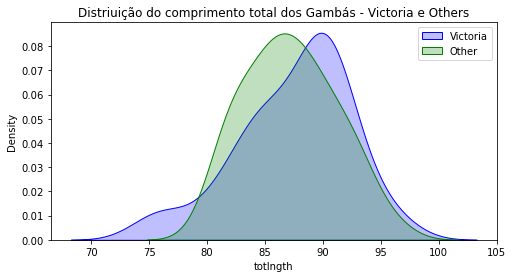

In [207]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição do comprimento total dos Gambás - Victoria e Others")

sns.kdeplot(df_vic['totlngth'], color='blue', shade=True, label='Victoria')
sns.kdeplot(df_oth['totlngth'], color='green', shade=True, label='Other')
plt.legend()
plt.show()

In [208]:
### estatísticas da idade dos gambás de populações distintas ###
print('Comprimento total médio Victoria:',round(df_vic['age'].mean(),2))
print('Comprimento total médio Others:',round(df_oth['age'].mean(),2))
print('Desvio padrão da Victoria:',round(df_vic['age'].std(),2))
print('Desvio padrão da Other:',round(df_oth['age'].std(),2))

Comprimento total médio Victoria: 4.02
Comprimento total médio Others: 3.58
Desvio padrão da Victoria: 2.11
Desvio padrão da Other: 1.65


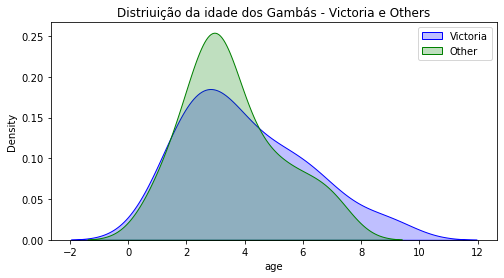

In [209]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição da idade dos Gambás - Victoria e Others")

sns.kdeplot(df_vic['age'], color='blue', shade=True, label='Victoria')
sns.kdeplot(df_oth['age'], color='green', shade=True, label='Other')
plt.legend()
plt.show()

In [210]:
### estatísticas do comprimento da cabeça dos gambás de populações distintas ###
print('Comprimento médio da cabeça Victoria:',round(df_vic['hdlngth'].mean(),2),'cm')
print('Comprimento médio da cabeça Others:',round(df_oth['hdlngth'].mean(),2),'cm')
print('Desvio padrão da Victoria:',round(df_vic['hdlngth'].std(),2),'cm')
print('Desvio padrão da Other:',round(df_oth['hdlngth'].std(),2),'cm')

Comprimento médio da cabeça Victoria: 92.6 cm
Comprimento médio da cabeça Others: 92.59 cm
Desvio padrão da Victoria: 2.73 cm
Desvio padrão da Other: 3.9 cm


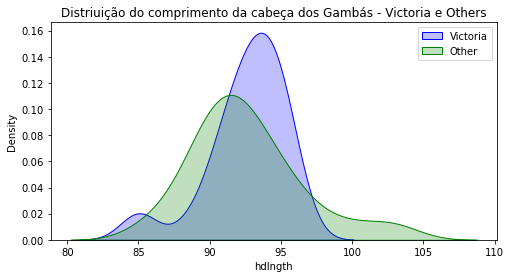

In [212]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição do comprimento da cabeça dos Gambás - Victoria e Others")

sns.kdeplot(df_vic['hdlngth'], color='blue', shade=True, label='Victoria')
sns.kdeplot(df_oth['hdlngth'], color='green', shade=True, label='Other')
plt.legend()
plt.show()

In [213]:
### estatísticas do comprimento do crânio dos gambás de populações distintas ###
print('Comprimento médio do crânio Victoria:',round(df_vic['skullw'].mean(),2),'cm')
print('Comprimento médio do crânio Others:',round(df_oth['skullw'].mean(),2),'cm')
print('Desvio padrão da Victoria:',round(df_vic['skullw'].std(),2),'cm')
print('Desvio padrão da Other:',round(df_oth['skullw'].std(),2),'cm')

Comprimento médio do crânio Victoria: 56.65 cm
Comprimento médio do crânio Others: 57.42 cm
Desvio padrão da Victoria: 2.56 cm
Desvio padrão da Other: 3.46 cm


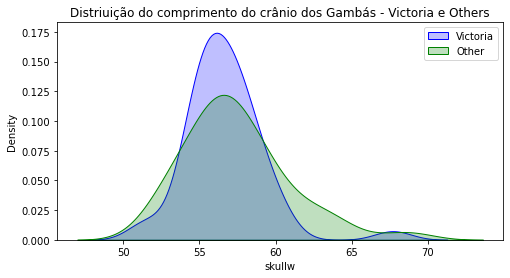

In [214]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição do comprimento do crânio dos Gambás - Victoria e Others")

sns.kdeplot(df_vic['skullw'], color='blue', shade=True, label='Victoria')
sns.kdeplot(df_oth['skullw'], color='green', shade=True, label='Other')
plt.legend()
plt.show()

In [215]:
### estatísticas do comprimento da cauda dos gambás de populações distintas ###
print('Comprimento médio da cauda Victoria:',round(df_vic['taill'].mean(),2),'cm')
print('Comprimento médio da cauda Others:',round(df_oth['taill'].mean(),2),'cm')
print('Desvio padrão da Victoria:',round(df_vic['taill'].std(),2),'cm')
print('Desvio padrão da Other:',round(df_oth['taill'].std(),2),'cm')

Comprimento médio da cauda Victoria: 35.93 cm
Comprimento médio da cauda Others: 38.0 cm
Desvio padrão da Victoria: 1.72 cm
Desvio padrão da Other: 1.54 cm


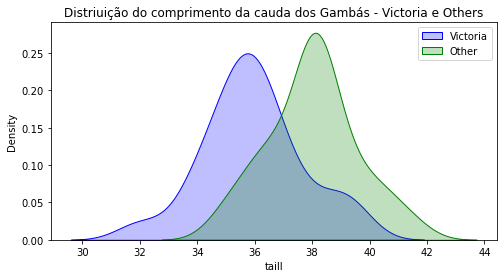

In [216]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição do comprimento da cauda dos Gambás - Victoria e Others")

sns.kdeplot(df_vic['taill'], color='blue', shade=True, label='Victoria')
sns.kdeplot(df_oth['taill'], color='green', shade=True, label='Other')
plt.legend()
plt.show()

In [217]:
### estatísticas do comprimento do pé dos gambás de populações distintas ###
print('Comprimento médio da cauda Victoria:',round(df_vic['footlgth'].mean(),2),'cm')
print('Comprimento médio da cauda Others:',round(df_oth['footlgth'].mean(),2),'cm')
print('Desvio padrão da Victoria:',round(df_vic['footlgth'].std(),2),'cm')
print('Desvio padrão da Other:',round(df_oth['footlgth'].std(),2),'cm')

Comprimento médio da cauda Victoria: 72.4 cm
Comprimento médio da cauda Others: 65.4 cm
Desvio padrão da Victoria: 2.58 cm
Desvio padrão da Other: 3.0 cm


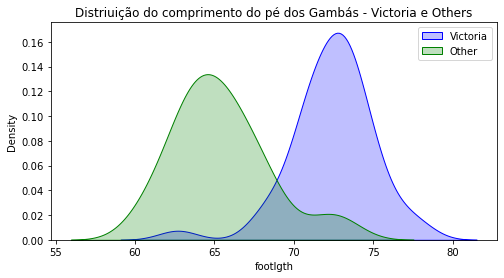

In [218]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição do comprimento do pé dos Gambás - Victoria e Others")

sns.kdeplot(df_vic['footlgth'], color='blue', shade=True, label='Victoria')
sns.kdeplot(df_oth['footlgth'], color='green', shade=True, label='Other')
plt.legend()
plt.show()

In [219]:
### estatísticas do comprimento da concha da orelha dos gambás de populações distintas ###
print('Comprimento médio da concha da orelha Victoria:',round(df_vic['earconch'].mean(),2),'cm')
print('Comprimento médio da concha da orelha Others:',round(df_oth['earconch'].mean(),2),'cm')
print('Desvio padrão da Victoria:',round(df_vic['earconch'].std(),2),'cm')
print('Desvio padrão da Other:',round(df_oth['earconch'].std(),2),'cm')

Comprimento médio da concha da orelha Victoria: 52.19 cm
Comprimento médio da concha da orelha Others: 44.84 cm
Desvio padrão da Victoria: 2.31 cm
Desvio padrão da Other: 1.68 cm


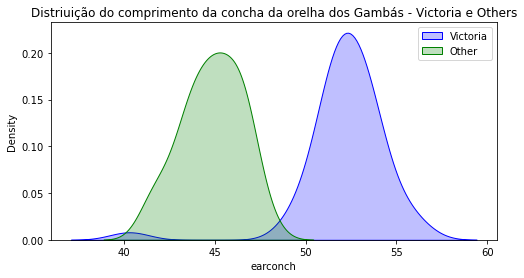

In [220]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição do comprimento da concha da orelha dos Gambás - Victoria e Others")

sns.kdeplot(df_vic['earconch'], color='blue', shade=True, label='Victoria')
sns.kdeplot(df_oth['earconch'], color='green', shade=True, label='Other')
plt.legend()
plt.show()

In [221]:
### estatísticas da distancia entre os olhos dos gambás de populações distintas ###
print('Distância médio dos olhos Victoria:',round(df_vic['eye'].mean(),2),'cm')
print('Distância médio dos olhos Others:',round(df_oth['eye'].mean(),2),'cm')
print('Desvio padrão da Victoria:',round(df_vic['eye'].std(),2),'cm')
print('Desvio padrão da Other:',round(df_oth['eye'].std(),2),'cm')

Distância médio dos olhos Victoria: 14.87 cm
Distância médio dos olhos Others: 14.93 cm
Desvio padrão da Victoria: 0.78 cm
Desvio padrão da Other: 1.12 cm


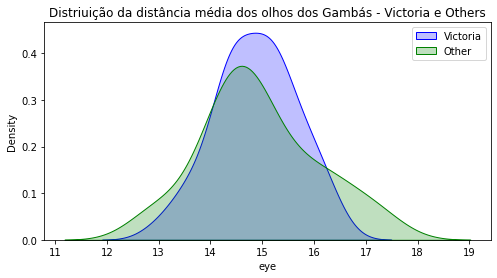

In [222]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição da distância média dos olhos dos Gambás - Victoria e Others")

sns.kdeplot(df_vic['eye'], color='blue', shade=True, label='Victoria')
sns.kdeplot(df_oth['eye'], color='green', shade=True, label='Other')
plt.legend()
plt.show()

In [223]:
### estatísticas do comprimento do peito dos gambás de populações distintas ###
print('Comprimento médio do peito Victoria:',round(df_vic['chest'].mean(),2),'cm')
print('Comprimento médio do peito Others:',round(df_oth['chest'].mean(),2),'cm')
print('Desvio padrão da Victoria:',round(df_vic['chest'].std(),2),'cm')
print('Desvio padrão da Other:',round(df_oth['chest'].std(),2),'cm')

Comprimento médio do peito Victoria: 27.45 cm
Comprimento médio do peito Others: 26.96 cm
Desvio padrão da Victoria: 1.92 cm
Desvio padrão da Other: 2.02 cm


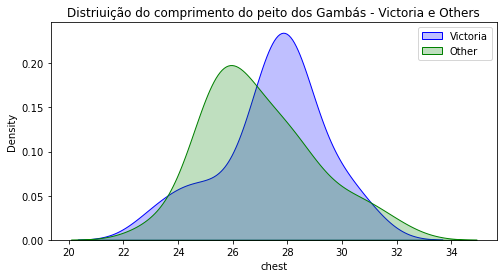

In [224]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição do comprimento do peito dos Gambás - Victoria e Others")

sns.kdeplot(df_vic['chest'], color='blue', shade=True, label='Victoria')
sns.kdeplot(df_oth['chest'], color='green', shade=True, label='Other')
plt.legend()
plt.show()

In [225]:
### estatísticas do comprimento da barriga dos gambás de populações distintas ###
print('Comprimento médio da barriga Victoria:',round(df_vic['belly'].mean(),2),'cm')
print('Comprimento médio da barriga Others:',round(df_oth['belly'].mean(),2),'cm')
print('Desvio padrão da Victoria:',round(df_vic['belly'].std(),2),'cm')
print('Desvio padrão da Other:',round(df_oth['belly'].std(),2),'cm')

Comprimento médio da barriga Victoria: 32.66 cm
Comprimento médio da barriga Others: 32.95 cm
Desvio padrão da Victoria: 2.78 cm
Desvio padrão da Other: 2.84 cm


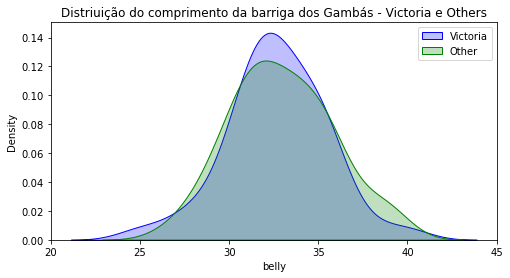

In [226]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição do comprimento da barriga dos Gambás - Victoria e Others")

sns.kdeplot(df_vic['belly'], color='blue', shade=True, label='Victoria')
sns.kdeplot(df_oth['belly'], color='green', shade=True, label='Other')
plt.legend()
plt.show()

### Estatísticas entre os sexos dos gambás: Macho e Fêmea

In [227]:
### estatísticas da idade dos gambás de sexos distintos ###
print('Idade média dos machos:',round(df_m['age'].mean(),2))
print('Idade média das femeas:',round(df_f['age'].mean(),2))
print('Desvio padrão dos machos:',round(df_m['age'].std(),2))
print('Desvio padrão das femeas:',round(df_f['age'].std(),2))

Idade média dos machos: 3.73
Idade média das femeas: 3.98
Desvio padrão dos machos: 1.89
Desvio padrão das femeas: 1.95


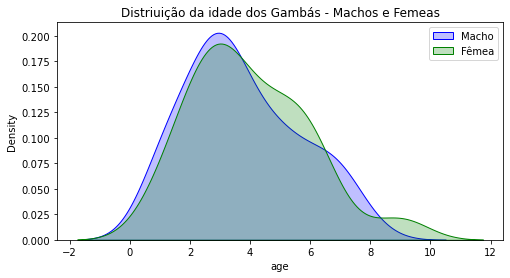

In [228]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição da idade dos Gambás - Machos e Femeas")

sns.kdeplot(df_m['age'], color='blue', shade=True, label='Macho')
sns.kdeplot(df_f['age'], color='green', shade=True, label='Fêmea')
plt.legend()
plt.show()

In [229]:
### estatísticas do comprimento total dos gambás de sexos distintos ###
print('Comprimento total médio dos machos:',round(df_m['totlngth'].mean(),2))
print('Comprimento total médio das femeas:',round(df_f['totlngth'].mean(),2))
print('Desvio padrão dos machos:',round(df_m['totlngth'].std(),2))
print('Desvio padrão das femeas:',round(df_f['totlngth'].std(),2))

Comprimento total médio dos machos: 86.51
Comprimento total médio das femeas: 87.91
Desvio padrão dos machos: 4.34
Desvio padrão das femeas: 4.18


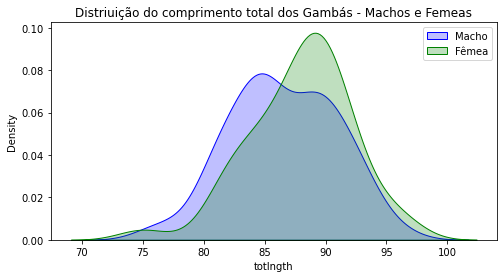

In [230]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição do comprimento total dos Gambás - Machos e Femeas")

sns.kdeplot(df_m['totlngth'], color='blue', shade=True, label='Macho')
sns.kdeplot(df_f['totlngth'], color='green', shade=True, label='Fêmea')
plt.legend()
plt.show()

In [231]:
### estatísticas do comprimento da cabeça dos gambás de sexos distintos ###
print('Comprimento médio da cabeça dos machos:',round(df_m['hdlngth'].mean(),2))
print('Comprimento médio da cabeça das femeas:',round(df_f['hdlngth'].mean(),2))
print('Desvio padrão dos machos:',round(df_m['hdlngth'].std(),2))
print('Desvio padrão das femeas:',round(df_f['hdlngth'].std(),2))

Comprimento médio da cabeça dos machos: 92.92
Comprimento médio da cabeça das femeas: 92.15
Desvio padrão dos machos: 4.13
Desvio padrão das femeas: 2.57


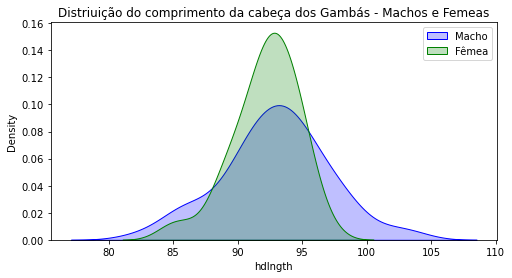

In [233]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição do comprimento da cabeça dos Gambás - Machos e Femeas")

sns.kdeplot(df_m['hdlngth'], color='blue', shade=True, label='Macho')
sns.kdeplot(df_f['hdlngth'], color='green', shade=True, label='Fêmea')
plt.legend()
plt.show()

In [234]:
### estatísticas do comprimento do peito dos gambás de sexos distintos ###
print('Comprimento médio do peito dos machos:',round(df_m['chest'].mean(),2))
print('Comprimento médio do peito das femeas:',round(df_f['chest'].mean(),2))
print('Desvio padrão dos machos:',round(df_m['chest'].std(),2))
print('Desvio padrão das femeas:',round(df_f['chest'].std(),2))

Comprimento médio do peito dos machos: 26.76
Comprimento médio do peito das femeas: 27.34
Desvio padrão dos machos: 2.16
Desvio padrão das femeas: 1.84


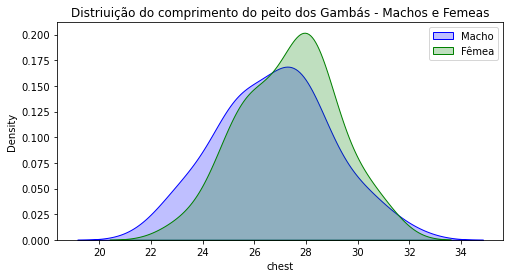

In [235]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição do comprimento do peito dos Gambás - Machos e Femeas")

sns.kdeplot(df_m['chest'], color='blue', shade=True, label='Macho')
sns.kdeplot(df_f['chest'], color='green', shade=True, label='Fêmea')
plt.legend()
plt.show()

In [236]:
### estatísticas do comprimento da barriga dos gambás de sexos distintos ###
print('Comprimento médio da barriga dos machos:',round(df_m['belly'].mean(),2))
print('Comprimento médio da barriga das femeas:',round(df_f['belly'].mean(),2))
print('Desvio padrão dos machos:',round(df_m['belly'].std(),2))
print('Desvio padrão das femeas:',round(df_f['belly'].std(),2))

Comprimento médio da barriga dos machos: 32.38
Comprimento médio da barriga das femeas: 32.88
Desvio padrão dos machos: 2.64
Desvio padrão das femeas: 2.93


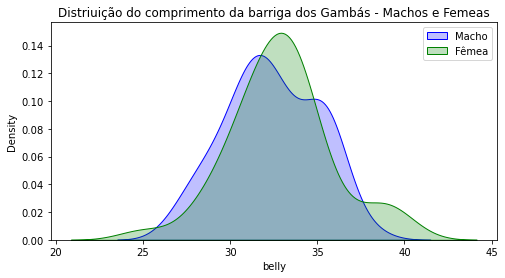

In [237]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição do comprimento da barriga dos Gambás - Machos e Femeas")

sns.kdeplot(df_m['belly'], color='blue', shade=True, label='Macho')
sns.kdeplot(df_f['belly'], color='green', shade=True, label='Fêmea')
plt.legend()
plt.show()

In [238]:
### estatísticas do comprimento do crânio dos gambás de sexos distintos ###
print('Comprimento médio do crânio dos machos:',round(df_m['skullw'].mean(),2))
print('Comprimento médio do crânio das femeas:',round(df_f['skullw'].mean(),2))
print('Desvio padrão dos machos:',round(df_m['skullw'].std(),2))
print('Desvio padrão das femeas:',round(df_f['skullw'].std(),2))

Comprimento médio do crânio dos machos: 57.09
Comprimento médio do crânio das femeas: 56.59
Desvio padrão dos machos: 3.45
Desvio padrão das femeas: 2.57


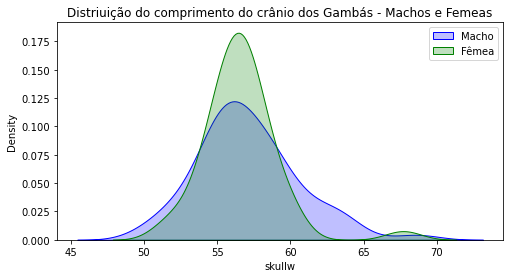

In [239]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição do comprimento do crânio dos Gambás - Machos e Femeas")

sns.kdeplot(df_m['skullw'], color='blue', shade=True, label='Macho')
sns.kdeplot(df_f['skullw'], color='green', shade=True, label='Fêmea')
plt.legend()
plt.show()

In [240]:
### estatísticas do comprimento da cauda dos gambás de sexos distintos ###
print('Comprimento médio da cauda dos machos:',round(df_m['taill'].mean(),2))
print('Comprimento médio da cauda das femeas:',round(df_f['taill'].mean(),2))
print('Desvio padrão dos machos:',round(df_m['taill'].std(),2))
print('Desvio padrão das femeas:',round(df_f['taill'].std(),2))

Comprimento médio da cauda dos machos: 36.94
Comprimento médio da cauda das femeas: 37.1
Desvio padrão dos machos: 2.06
Desvio padrão das femeas: 1.83


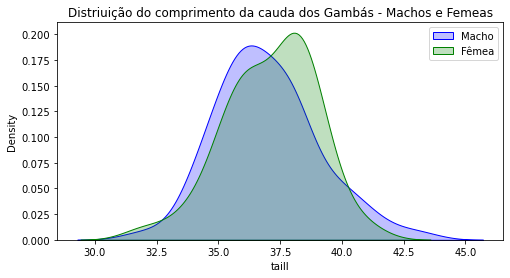

In [241]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição do comprimento da cauda dos Gambás - Machos e Femeas")

sns.kdeplot(df_m['taill'], color='blue', shade=True, label='Macho')
sns.kdeplot(df_f['taill'], color='green', shade=True, label='Fêmea')
plt.legend()
plt.show()

In [242]:
### estatísticas do comprimento da conha da orelha dos gambás de sexos distintos ###
print('Comprimento médio da concha de orelha dos machos:',round(df_m['earconch'].mean(),2))
print('Comprimento médio da concha de orelha das femeas:',round(df_f['earconch'].mean(),2))
print('Desvio padrão dos machos:',round(df_m['earconch'].std(),2))
print('Desvio padrão das femeas:',round(df_f['earconch'].std(),2))

Comprimento médio da concha de orelha dos machos: 47.82
Comprimento médio da concha de orelha das femeas: 48.58
Desvio padrão dos machos: 3.99
Desvio padrão das femeas: 4.27


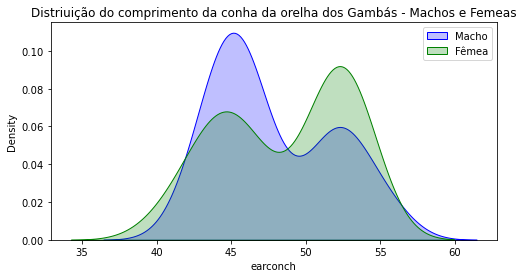

In [243]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição do comprimento da conha da orelha dos Gambás - Machos e Femeas")

sns.kdeplot(df_m['earconch'], color='blue', shade=True, label='Macho')
sns.kdeplot(df_f['earconch'], color='green', shade=True, label='Fêmea')
plt.legend()
plt.show()

In [244]:
### estatísticas da distância dos olhos dos gambás de sexos distintos ###
print('Distância média dos olhos dos machos:',round(df_m['eye'].mean(),2))
print('Distância média dos olhos dos das femeas:',round(df_f['eye'].mean(),2))
print('Desvio padrão dos machos:',round(df_m['eye'].std(),2))
print('Desvio padrão das femeas:',round(df_f['eye'].std(),2))

Distância média dos olhos dos machos: 15.21
Distância média dos olhos dos das femeas: 14.81
Desvio padrão dos machos: 1.04
Desvio padrão das femeas: 1.03


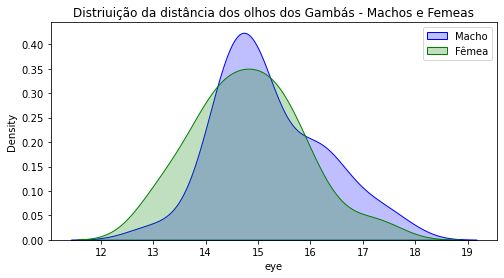

In [245]:
### plot da distribuição de frequencia ###
plt.figure(figsize=(8,4))
plt.title("Distriuição da distância dos olhos dos Gambás - Machos e Femeas")

sns.kdeplot(df_m['eye'], color='blue', shade=True, label='Macho')
sns.kdeplot(df_f['eye'], color='green', shade=True, label='Fêmea')
plt.legend()
plt.show()

## Kolmogorov-Smirnov Teste (KS test)

#### Objetivo: O objetivo de usar o teste de Kolmogorov-Smirnov para verificar se os conjuntos de dados são estatisticamente iguais, ou seja, se as duas amostras pertencem a mesma população.

#### H0 – Hipótese Nula --> As amostras X e Y são estatisticamente iguais.

#### H1 – Hipótese Alternativa --> As amostras de X e Y não são estatisticamente iguais!

#### KS entre as Populações de gambás: Victoria e Others

In [246]:
### teste KS Teste ###
### IDADE ###
feature = 'age'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_vic[feature], df_oth[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada!')
print('P-value: ', round(pvalue,2))

Característica analisada: age
Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!
P-value:  0.83


In [247]:
### teste KS Teste ###
### COMPRIMENTO DA CABEÇA ###
feature = 'hdlngth'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_vic[feature], df_oth[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: hdlngth
Hipótese H0 rejeitada! Amostras diferentes.
P-value:  0.2


In [248]:
### teste KS Teste ###
### COMPRIMENTO DO CRÂNIO ###
feature = 'skullw'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_vic[feature], df_oth[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: skullw
Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!
P-value:  0.6


In [249]:
### teste KS Teste ###
### COMPRIMENTO TOTAL ###
feature = 'totlngth'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_vic[feature], df_oth[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: totlngth
Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!
P-value:  0.31


In [250]:
### teste KS Teste ###
### COMPRIMENTO DA CAUDA ###
feature = 'taill'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_vic[feature], df_oth[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: taill
Hipótese H0 rejeitada! Amostras diferentes.
P-value:  0.0


In [251]:
### teste KS Teste ###
### COMPRIMENTO DO PÉ ###
feature = 'footlgth'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_vic[feature], df_oth[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: footlgth
Hipótese H0 rejeitada! Amostras diferentes.
P-value:  0.0


In [252]:
### teste KS Teste ###
### COMPRIMENTO DA CONCHA DA ORELHA ###
feature = 'earconch'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_vic[feature], df_oth[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: earconch
Hipótese H0 rejeitada! Amostras diferentes.
P-value:  0.0


In [253]:
### teste KS Teste ###
### DISTÂNCIA DOS OLHOS ###
feature = 'eye'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_vic[feature], df_oth[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: eye
Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!
P-value:  0.77


In [254]:
### teste KS Teste ###
### COMPRIMENTO DO PEITO ###
feature = 'chest'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_vic[feature], df_oth[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: chest
Hipótese H0 rejeitada! Amostras diferentes.
P-value:  0.03


In [255]:
### teste KS Teste ###
### COMPRIMENTO DA BARRIGA ###
feature = 'belly'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_vic[feature], df_oth[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: belly
Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!
P-value:  1.0


#### KS entre as Populações de gambás: Macho e Fêmea

In [256]:
### teste KS Teste ###
### IDADE ###
feature = 'age'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_m[feature], df_f[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: age
Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!
P-value:  0.99


In [257]:
### teste KS Teste ###
### COMPRIMENTO DA CABEÇA ###
feature = 'hdlngth'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_m[feature], df_f[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: hdlngth
Hipótese H0 rejeitada! Amostras diferentes.
P-value:  0.18


In [258]:
### teste KS Teste ###
### COMPRIMENTO TOTAL ###
feature = 'totlngth'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_m[feature], df_f[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: totlngth
Hipótese H0 rejeitada! Amostras diferentes.
P-value:  0.09


In [259]:
### teste KS Teste ###
### COMPRIMENTO DA CAUDA ###
feature = 'taill'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_m[feature], df_f[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: taill
Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!
P-value:  0.74


In [260]:
### teste KS Teste ###
### COMPRIMENTO DO PÉ ###
feature = 'footlgth'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_m[feature], df_f[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: footlgth
Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!
P-value:  0.37


In [261]:
### teste KS Teste ###
### COMPRIMENTO DA CONCHA DA ORELHA ###
feature = 'earconch'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_m[feature], df_f[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: earconch
Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!
P-value:  0.31


In [262]:
### teste KS Teste ###
### DISTÂNCIA DOS OLHOS ###
feature = 'eye'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_m[feature], df_f[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: eye
Hipótese H0 rejeitada! Amostras diferentes.
P-value:  0.18


In [263]:
### teste KS Teste ###
### COMPRIMENTO DO PEITO ###
feature = 'chest'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_m[feature], df_f[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: chest
Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!
P-value:  0.42


In [264]:
### teste KS Teste ###
### COMPRIMENTO DA BARRIGA ###
feature = 'belly'
print('Característica analisada:', feature)
statistic, pvalue = ks_2samp(df_m[feature], df_f[feature])
if pvalue>=statistic:
    print('Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!')
if pvalue<statistic:
    print('Hipótese H0 rejeitada! Amostras diferentes.')
print('P-value: ', round(pvalue,2))

Característica analisada: belly
Hipótese H0 não rejeitada, as amostras são estatisticamente iguais!
P-value:  0.78


### CONCLUSÕES